Training on MNIST dataset
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1: Accuracy = 0.9649
Epoch 2: Accuracy = 0.9756
Epoch 3: Accuracy = 0.9753
Epoch 4: Accuracy = 0.9782
Epoch 5: Accuracy = 0.9810
Epoch 6: Accuracy = 0.9783
Epoch 7: Accuracy = 0.9814
Epoch 8: Accuracy = 0.9787
Epoch 9: Accuracy = 0.9777
Epoch 10: Accuracy = 0.9772
Epoch 11: Accuracy = 0.9818
Epoch 12: Accuracy = 0.9787
Epoch 13: Accuracy = 0.9793
Epoch 14: Accuracy = 0.9802
Epoch 15: Accuracy = 0.9802
Epoch 16: Accuracy = 0.9818
Epoch 17: Accuracy = 0.9791
Epoch 18: Accuracy = 0.9822
Epoch 19: Accuracy = 0.9805
Epoch 20: Accuracy = 0.9798


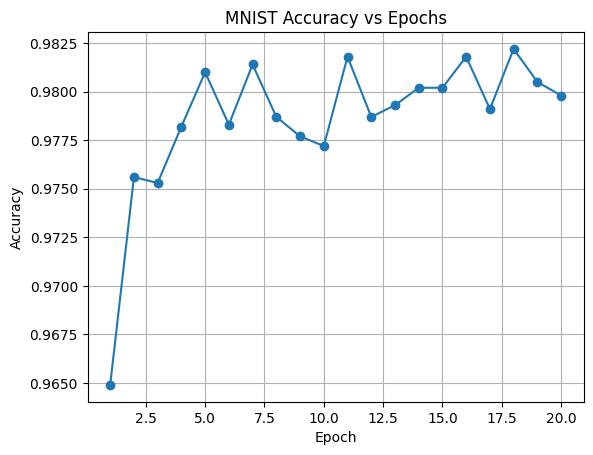


Training on CIFAR-10 dataset
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1: Accuracy = 0.3930
Epoch 2: Accuracy = 0.4335
Epoch 3: Accuracy = 0.4299
Epoch 4: Accuracy = 0.4523
Epoch 5: Accuracy = 0.4663
Epoch 6: Accuracy = 0.4511
Epoch 7: Accuracy = 0.4606
Epoch 8: Accuracy = 0.4816
Epoch 9: Accuracy = 0.4824
Epoch 10: Accuracy = 0.5029
Epoch 11: Accuracy = 0.4965
Epoch 12: Accuracy = 0.4976
Epoch 13: Accuracy = 0.5011
Epoch 14: Accuracy = 0.5210
Epoch 15: Accuracy = 0.5082
Epoch 16: Accuracy = 0.5094
Epoch 17: Accuracy = 0.5042
Epoch 18: Accuracy = 0.5017
Epoch 19: Accuracy = 0.5121
Epoch 20: Accuracy = 0.4982


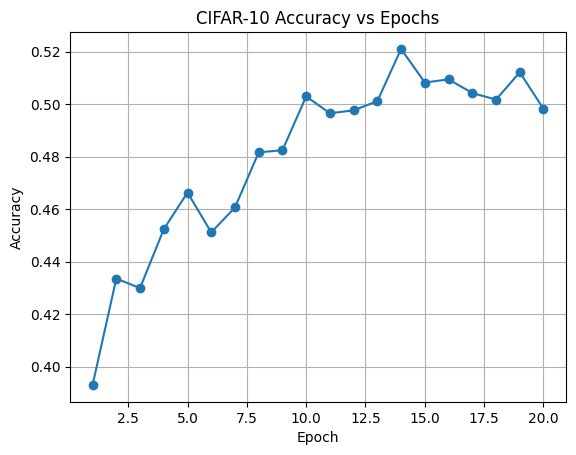

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Function to preprocess data
def preprocess_data(dataset='mnist'):
    if dataset == 'mnist':
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = x_train.reshape(-1, 28*28) / 255.0
        x_test = x_test.reshape(-1, 28*28) / 255.0
    elif dataset == 'cifar10':
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.reshape(-1, 32*32*3) / 255.0
        x_test = x_test.reshape(-1, 32*32*3) / 255.0
        y_train = y_train.flatten()
        y_test = y_test.flatten()
    else:
        raise ValueError("Invalid dataset")

    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Build feedforward neural network
def build_ffnn(input_shape):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,)),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and record accuracy
def train_model(dataset='mnist', max_epochs=20):
    x_train, y_train, x_test, y_test = preprocess_data(dataset)
    model = build_ffnn(x_train.shape[1])
    acc_list = []

    for epoch in range(1, max_epochs+1):
        model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=0)
        loss, acc = model.evaluate(x_test, y_test, verbose=0)
        acc_list.append(acc)
        print(f"Epoch {epoch}: Accuracy = {acc:.4f}")

    return acc_list

# Plotting function
def plot_accuracy(acc_list, title):
    plt.plot(range(1, len(acc_list)+1), acc_list, marker='o')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Run for MNIST
print("Training on MNIST dataset")
mnist_acc = train_model('mnist', max_epochs=20)
plot_accuracy(mnist_acc, "MNIST Accuracy vs Epochs")

# Run for CIFAR-10
print("\nTraining on CIFAR-10 dataset")
cifar_acc = train_model('cifar10', max_epochs=20)
plot_accuracy(cifar_acc, "CIFAR-10 Accuracy vs Epochs")
